In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/50-startups/50_Startups.csv


# Data Describtion

In [2]:
#reading the file data
data = pd.read_csv("/kaggle/input/50-startups/50_Startups.csv")
data.info()
#the data has 5 columns with 4 in float and 1 a string 
#the label is the profit
#the other are the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
# the data is so clean
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
# know the main numerical information about the data
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Data Visualization

(Profit             1.000000
 R&D Spend          0.972900
 Marketing Spend    0.747766
 Administration     0.200717
 Name: Profit, dtype: float64,
 <Axes: >)

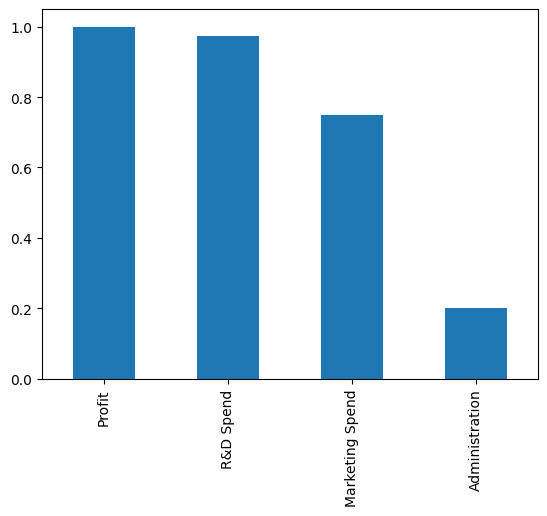

In [5]:
import matplotlib as plt
#know the numerical data correlation with profit
x = data[['Administration' , 'R&D Spend' , 'Marketing Spend' , 'Profit']].corr()['Profit'].sort_values(ascending = False)
# we find that R&D Spend and Marketing Spend have strong correlation
x , x.plot(kind = 'bar')

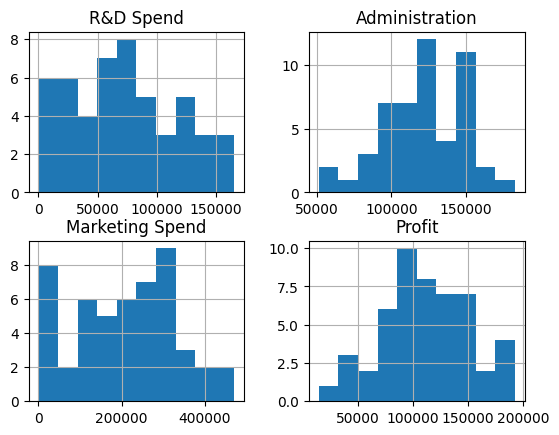

In [6]:
#the data has normal distributiion
data.hist();

In [7]:
#categorical data
import plotly.express as px
px.pie(data , names='State')

In [8]:
data['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

<Axes: xlabel='State', ylabel='Profit'>

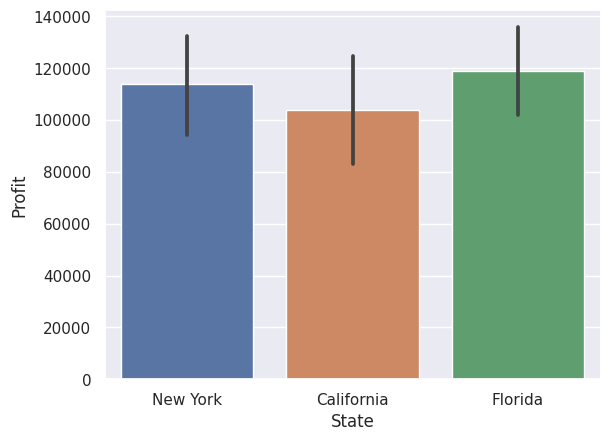

In [9]:
#see the relation between categorical and numerical data
import seaborn as sns
sns.set()
sns.barplot(data =data , x = 'State' , y = 'Profit')

# Train_set and test_set split 

In [10]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(data , test_size = 0.2 , random_state = 42)

In [11]:
train_set.shape , test_set.shape  

((40, 5), (10, 5))

array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

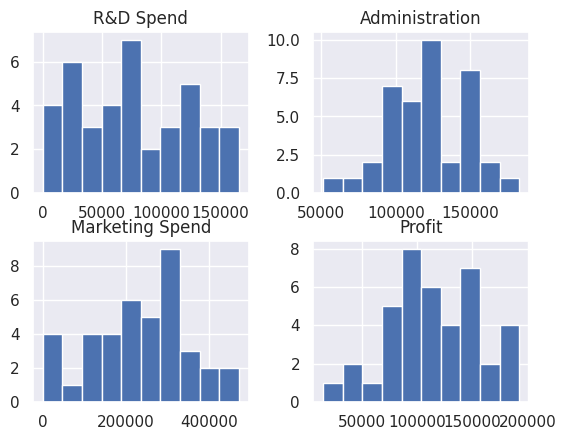

In [12]:
train_set.hist()

array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

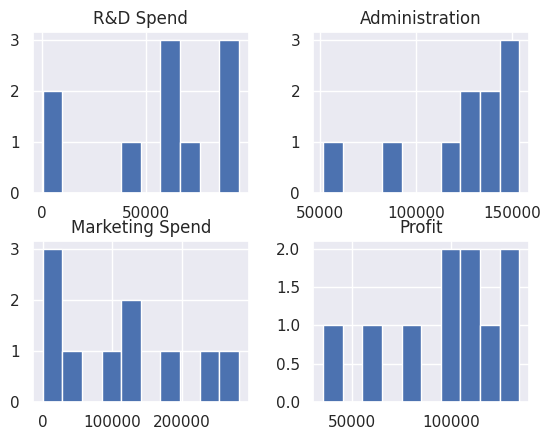

In [13]:
test_set.hist()

In [14]:
#preparing the training data into needed ones:
#1- features and labels
#2- split features into numerical and categiorical data
train_feature = train_set.drop('Profit' , axis = 1).copy()
train_label  = train_set[['Profit']].copy()
train_numf  = train_feature.drop('State' ,axis = 1).copy()
train_catf = train_feature[['State']].copy()
train_feature.shape , train_label.shape  , train_numf.shape  , train_catf.shape 

((40, 4), (40, 1), (40, 3), (40, 1))

# Dealing With numerical data

In [15]:
#imputation using median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(train_numf)
imputer.statistics_

array([ 75124.21 , 120134.7  , 249791.995])

In [16]:
#making a dataframe of the imputation numerical data
Imputation_Data = pd.DataFrame(imputer.transform(train_numf) , index = train_numf.index , columns = train_numf.columns)
Imputation_Data.head(3)

,R&D Spend,Administration,Marketing Spend
12,93863.75,127320.38,249839.44
4,142107.34,91391.77,366168.42
37,44069.95,51283.14,197029.42


In [17]:
# Dealing with categorical data
from sklearn.preprocessing import OneHotEncoder
catencoder = OneHotEncoder(sparse_output = False)
cat = catencoder.fit_transform(train_catf)
cat

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Feature Scaling

In [18]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature = scaler.fit_transform(train_numf) 
feature

array([[ 0.34202149,  0.22787678,  0.12425038],
       [ 1.36207849, -1.0974737 ,  1.14990688],
       [-0.71081297, -2.5770186 , -0.34136825],
       [ 0.90611438,  1.0172367 ,  0.66890185],
       [ 1.40997088, -0.09115403,  1.30006861],
       [ 1.20367103,  0.96116332, -0.95248784],
       [-1.05285826, -1.34392538, -0.62843389],
       [-1.61480906, -0.19649414,  0.54106768],
       [-1.642623  ,  0.52691442, -2.07854935],
       [ 0.77885123,  0.05437051,  0.2294954 ],
       [ 0.96515572, -0.45976843,  0.61043134],
       [ 0.00687736,  0.01677049,  0.25215324],
       [-0.01361318, -0.80643974, -0.83912073],
       [-0.66099544,  1.34830937, -0.2199755 ],
       [-0.34996231,  1.16416226, -1.30074144],
       [ 1.85350175,  0.58117289,  2.08110569],
       [-1.17369938,  1.24178366, -1.82872605],
       [-0.11798808,  0.24795036,  1.03542337],
       [-0.46926521, -0.66714345, -0.18614397],
       [ 1.14576723, -0.78676456,  1.12074899],
       [-0.25546817,  1.17634061, -1.133

# Making A Pipeline

In [19]:
#pipeline for numerical data
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')) , ('std_scaler' , StandardScaler())])
num_pipe = pipeline.fit_transform(train_numf)

#dealing with categorical data
from sklearn.compose import ColumnTransformer
num =list(train_numf)
cat = ['State']

full_pipeline = ColumnTransformer([('num' ,pipeline , num) , ("cat" , OneHotEncoder(sparse = False) , cat)])

# Using make_column_transformer
from sklearn.compose import make_column_transformer
full_pipeline = make_column_transformer((pipeline, num),(OneHotEncoder(sparse_output= False , drop = 'first'), cat))

# Transform the training data
train_features_prepared = full_pipeline.fit_transform(train_feature)
train_features_prepared.shape

(40, 5)

# Modeling

In [20]:
#linear Regression
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(train_features_prepared ,train_label)
lin_predict = lin.predict(train_features_prepared)

#check accuracy
from sklearn.metrics import r2_score
print("The Accuracy of the linear Regression : " ,r2_score(train_label , lin_predict), '%')

#applying cross validation
from sklearn.model_selection import cross_val_score
lin_score = cross_val_score(lin , train_features_prepared , train_label , scoring = 'r2' , cv = 10)
print("linear cross validation score: " , lin_score)
print("linear cross validation mean score: " , round(lin_score.mean() , 2))
print("linear cross validation std score: " , round(lin_score.std() , 2))

The Accuracy of the linear Regression :  0.9537019995248526 %
linear cross validation score:  [0.9226481  0.97501191 0.93143071 0.96694209 0.9408353  0.93863795
 0.9631974  0.93125019 0.87182566 0.70645281]
linear cross validation mean score:  0.91
linear cross validation std score:  0.07


In [21]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(train_features_prepared ,train_label)
tree_predict = tree.predict(train_features_prepared)

#check accuracy
from sklearn.metrics import r2_score
print("The Accuracy of the DecisionTree : " ,r2_score(train_label , tree_predict))
#The Accuracy of the DecisionTree :  100.0 %
#the accuracy of the decisiontree is not accurate very much

#applying cross validation
from sklearn.model_selection import cross_val_score
tree_score = cross_val_score(tree , train_features_prepared , train_label , scoring = 'r2' , cv = 10)
print("DecisionTree cross validation score: " , tree_score)
print("DecisionTree cross validation mean score: " , round(tree_score.mean() , 2))
print("DecisionTree cross validation std score: " , round(tree_score.std() , 2))

The Accuracy of the DecisionTree :  1.0
DecisionTree cross validation score:  [0.6252649  0.84261972 0.81708806 0.94442146 0.98819289 0.98342355
 0.89156042 0.90551398 0.9196828  0.80319339]
DecisionTree cross validation mean score:  0.87
DecisionTree cross validation std score:  0.1


# Fine Tuning

In [22]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [1,2,3,4] , 'max_features': [2,4,6,8]}
grid = GridSearchCV(tree , parameters , cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(train_features_prepared , train_label)
grid.best_params_

{'max_depth': 4, 'max_features': 4}

In [23]:
#make cross validation again 
from sklearn.tree import DecisionTreeRegressor
treef = DecisionTreeRegressor(max_depth = 4 , max_features = 6)
treef.fit(train_features_prepared ,train_label)
treef_predict = treef.predict(train_features_prepared)

#check accuracy
from sklearn.metrics import r2_score
print("The Accuracy of the DecisionTree : " ,r2_score(train_label , treef_predict))

#applying cross validation
from sklearn.model_selection import cross_val_score
treef_score = cross_val_score(treef , train_features_prepared , train_label , scoring = 'r2' , cv = 10)
print("DecisionTree cross validation score: " , treef_score)
print("DecisionTree cross validation mean score: " , round(treef_score.mean() , 2))
print("DecisionTree cross validation std score: " , round(treef_score.std() , 2))

The Accuracy of the DecisionTree :  0.9876876614905055
DecisionTree cross validation score:  [0.78043835 0.8208508  0.83443694 0.94251002 0.9543826  0.97757097
 0.88448248 0.84211657 0.88678491 0.09882781]
DecisionTree cross validation mean score:  0.8
DecisionTree cross validation std score:  0.24


# Testing accuracy

In [24]:
#split test_set into feature and label
test_feature = test_set.drop('Profit' , axis = 1).copy()
test_label  = test_set[['Profit']].copy()

#making the pipeline for the testing data
test_features_prepared = full_pipeline.transform(test_feature)

lin_test = lin.predict(test_features_prepared)
tree_test = treef.predict(test_features_prepared)

#calculating the accuracy of the machine learning models
print("Linear Regression Accuracy on Test Data: ", r2_score(test_label, lin_test))
print("Decision Tree Accuracy on Test Data: ", r2_score(test_label, tree_test))

Linear Regression Accuracy on Test Data:  0.8987266414319839
Decision Tree Accuracy on Test Data:  0.7327715219618318


# Making DataFrame of models accuracy

In [25]:
#making a dataframe of the whole accuracy needed
#making the percent % of them
pd.DataFrame({ "Linear Regression": [r2_score(train_label , lin_predict)*100, 
                                     r2_score(test_label, lin_test)*100],
              "Decision Tree": [r2_score(train_label, treef_predict)*100,
                                r2_score(test_label, tree_test)*100]},
                                index=["Training Accuracy", "Testing Accuracy"])

,Linear Regression,Decision Tree
Training Accuracy,95.370200,98.768766
Testing Accuracy,89.872664,73.277152
